In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load scaled dataset
df = pd.read_csv("Data/scaled_data.csv")

In [3]:
# Define target and features
X = df.drop('sex', axis=1)  # Scaled features
y = df['sex']  # Target variable (binary: 0, 1)

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# -------------------------
# Logistic Regression
# -------------------------
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [6]:
# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9104477611940298
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.89      0.94      0.91        34

    accuracy                           0.91        67
   macro avg       0.91      0.91      0.91        67
weighted avg       0.91      0.91      0.91        67



In [7]:
# -------------------------
# Support Vector Machine (SVM)
# -------------------------
svm_model = SVC(kernel='linear')  # Linear kernel for simplicity
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [8]:
# Evaluate SVM
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9253731343283582
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.91      0.94      0.93        34

    accuracy                           0.93        67
   macro avg       0.93      0.93      0.93        67
weighted avg       0.93      0.93      0.93        67



In [9]:
# -------------------------
# k-Nearest Neighbors (KNN)
# -------------------------
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [10]:
# Evaluate KNN
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9253731343283582
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.91      0.94      0.93        34

    accuracy                           0.93        67
   macro avg       0.93      0.93      0.93        67
weighted avg       0.93      0.93      0.93        67



In [11]:
# -------------------------
# Visualization: Confusion Matrices
# -------------------------
models = {'Logistic Regression': y_pred_log_reg, 'SVM': y_pred_svm, 'KNN': y_pred_knn}

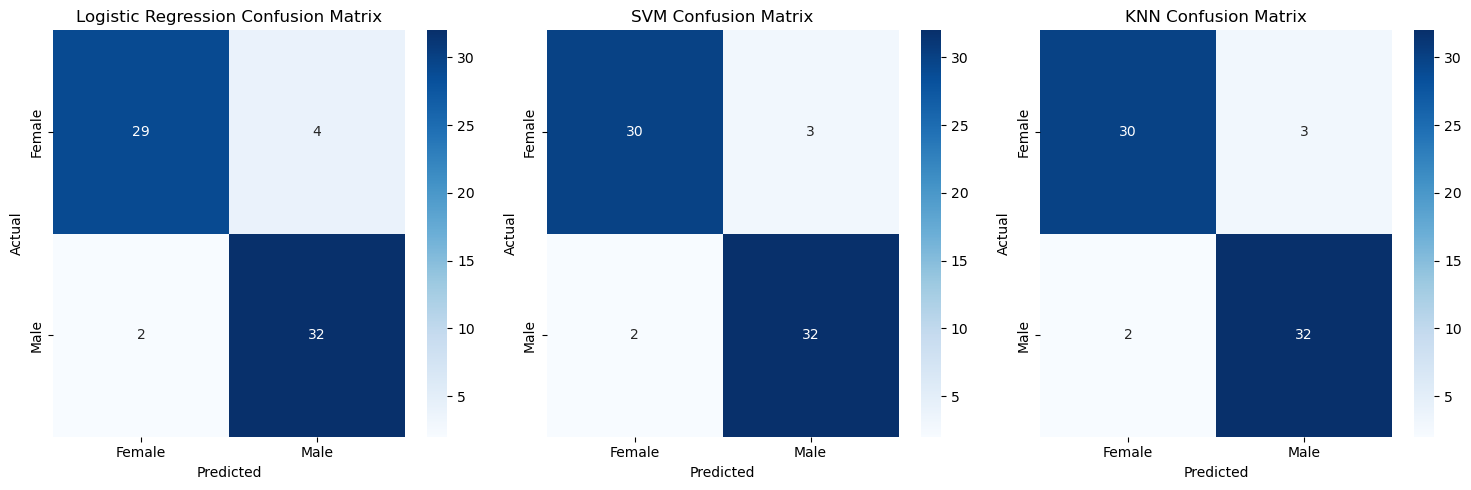

In [12]:
plt.figure(figsize=(15, 5))
for i, (model_name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()